In [98]:
import pandas as pd
import numpy as np
from os import listdir
import matplotlib.pyplot as plt
from textblob import TextBlob # NLP
import nltk # NLP
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

## Load Datasets

In [99]:
dataframes = {}
for file in listdir('.'):
    if file.endswith('.csv'):
        dataframes[file[:-4]] = pd.read_csv(file)
        print(file[:-4])

packages
analytics_country_data
packages_undeployed
analytics_daily_users
analytics_daily_pageviews


/Users/t.k/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Summarize Datasets

In [100]:
dataframes['packages'].head(5)

,created_at,test_week,test_id,headline,image_id,excerpt,lede,slug,share_text,share_image,impressions,clicks,first_place,winner
0,2014-11-20,2014-11-17,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,Anyone who's ever felt guilty about shopping a...,NaN,3052,150,True,True
1,2014-11-20,2014-11-17,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,Walmart is getting schooled by another retaile...,NaN,3033,122,False,False
2,2014-11-20,2014-11-17,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,Walmart may not be crapping their pants over t...,NaN,3092,110,False,False
3,2014-11-20,2014-11-17,546d902c26714c6c44000039,This Is What Sexism Against Men Sounds Like,546bc55335992b86c8000043,Things that matter. Pass 'em on.,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,"If you ever wondered, ""but what about the men?...",NaN,3526,90,False,False
4,2014-11-20,2014-11-17,546d902c26714c6c44000039,This Is What Sexism Against Men Sounds Like,546d900426714cd2dd00002e,Things that matter. Pass 'em on.,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,"If you ever wondered, ""but what about the men?...",NaN,3506,120,True,False


In [101]:
dataframes['packages'].describe(include='all')

,created_at,test_week,test_id,headline,image_id,excerpt,lede,slug,share_text,share_image,impressions,clicks,first_place,winner
count,150817,150817,150817,150816,150636,134790,150713,150817,20900,49800,150817.000000,150817.000000,150817,150817
unique,803,119,32487,65362,43687,16636,13902,142964,10151,12386,NaN,NaN,2,2
top,2014-11-26,2014-10-27,53ffaa1f262789cbf4000006,Dustin Hoffman Breaks Down Crying Explaining S...,5416727b3aed35ad1e000025,Things that matter. Pass 'em on.,"<p>Shane Koyczan was <a href=""http://u.pw/1m4R...",her-dad-thinks-being-gay-was-her-choice-the-wo...,"""It isn't cute. It isn't funny. You've talked ...",thumb-1.jpg,NaN,NaN,False,False
freq,723,3259,20,151,146,76224,325,12,151,452,NaN,NaN,118695,143153
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3569.046447,54.255648,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1435.995922,45.521282,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2745.000000,25.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3117.000000,42.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4089.000000,70.000000,NaN,NaN


In [102]:
dataframes['packages'].isnull().sum()

created_at          0
test_week           0
test_id             0
headline            1
image_id          181
excerpt         16027
lede              104
slug                0
share_text     129917
share_image    101017
impressions         0
clicks              0
first_place         0
winner              0
dtype: int64

## Visualization

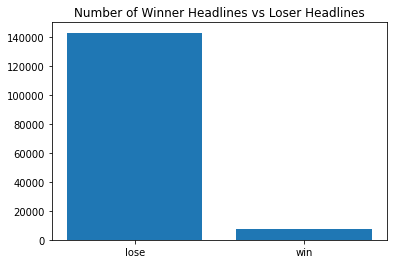

In [103]:
plt.bar(['lose', 'win'], dataframes['packages'].groupby('winner').count()['created_at'])
plt.title('Number of Winner Headlines vs Loser Headlines')
plt.show()

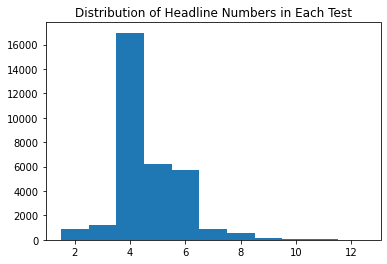

In [104]:
plt.hist(dataframes['packages'].groupby('test_id').count()['created_at'], bins=np.arange(1.5, 13.5, 1))
plt.title('Distribution of Headline Numbers in Each Test')
plt.show()

## Preprocess Text Data

In [105]:
different_headline = dataframes['packages'].groupby('test_id').filter(lambda x: len(pd.unique(x['headline'])) >= 2 and
                                                                     not x['headline'].isnull().values.any())
different_headline['click_ratio'] = different_headline['clicks'] / different_headline['impressions']
different_headline.head(5)

,created_at,test_week,test_id,headline,image_id,excerpt,lede,slug,share_text,share_image,impressions,clicks,first_place,winner,click_ratio
12,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,What They Learned From The Scientist Was Terri...,546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,what-they-learned-from-the-scientist-was-terri...,NaN,NaN,4594,51,False,False,0.011101
22,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,A Science Guy Helps 3 Dudes From America Under...,546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,a-science-guy-helps-3-dudes-from-america-under...,NaN,NaN,4571,58,False,False,0.012689
23,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,He Sat Them Down And Told Them About An Immine...,546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,he-sat-them-down-and-told-them-about-an-immine...,NaN,NaN,4601,27,False,False,0.005868
24,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,"The 3 Of Them Needed To See It In Person, And ...",546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,the-3-of-them-needed-to-see-it-in-person-and-t...,NaN,NaN,4567,63,True,False,0.013795
25,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,"They May Not Be The Most Handsome Dudes, But T...",546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,they-may-not-be-the-most-handsome-dudes-but-th...,NaN,NaN,4524,44,False,False,0.009726


In [106]:
different_headline['headline_blob'] = different_headline['headline'].astype(str).apply(lambda x: TextBlob(x))
different_headline.head(5)

,created_at,test_week,test_id,headline,image_id,excerpt,lede,slug,share_text,share_image,impressions,clicks,first_place,winner,click_ratio,headline_blob
12,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,What They Learned From The Scientist Was Terri...,546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,what-they-learned-from-the-scientist-was-terri...,NaN,NaN,4594,51,False,False,0.011101,"(W, h, a, t, , T, h, e, y, , L, e, a, r, n, ..."
22,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,A Science Guy Helps 3 Dudes From America Under...,546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,a-science-guy-helps-3-dudes-from-america-under...,NaN,NaN,4571,58,False,False,0.012689,"(A, , S, c, i, e, n, c, e, , G, u, y, , H, ..."
23,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,He Sat Them Down And Told Them About An Immine...,546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,he-sat-them-down-and-told-them-about-an-immine...,NaN,NaN,4601,27,False,False,0.005868,"(H, e, , S, a, t, , T, h, e, m, , D, o, w, ..."
24,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,"The 3 Of Them Needed To See It In Person, And ...",546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,the-3-of-them-needed-to-see-it-in-person-and-t...,NaN,NaN,4567,63,True,False,0.013795,"(T, h, e, , 3, , O, f, , T, h, e, m, , N, ..."
25,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,"They May Not Be The Most Handsome Dudes, But T...",546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,they-may-not-be-the-most-handsome-dudes-but-th...,NaN,NaN,4524,44,False,False,0.009726,"(T, h, e, y, , M, a, y, , N, o, t, , B, e, ..."


In [107]:
different_headline['sentiment'] = different_headline['headline_blob'].apply(lambda x: x.sentiment)
different_headline['sentiment']

12                                       (-1.0, 1.0)
22                                        (0.2, 0.2)
23        (-0.15555555555555559, 0.2888888888888889)
24                        (0.22499999999999998, 0.8)
25         (0.31666666666666665, 0.7833333333333333)
                             ...                    
150794                                   (-0.3, 0.5)
150795                                    (0.0, 0.5)
150796                                    (0.5, 0.5)
150797                                    (0.5, 0.5)
150798                                    (0.5, 0.5)
Name: sentiment, Length: 81892, dtype: object

In [108]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
different_headline['tags'] = different_headline['headline_blob'].apply(lambda x: x.tags)
different_headline.head(5)

[nltk_data] Downloading package punkt to /Users/t.k/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/t.k/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,created_at,test_week,test_id,headline,image_id,excerpt,lede,slug,share_text,share_image,impressions,clicks,first_place,winner,click_ratio,headline_blob,sentiment,tags
12,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,What They Learned From The Scientist Was Terri...,546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,what-they-learned-from-the-scientist-was-terri...,NaN,NaN,4594,51,False,False,0.011101,"(W, h, a, t, , T, h, e, y, , L, e, a, r, n, ...","(-1.0, 1.0)","[(What, WP), (They, PRP), (Learned, VBD), (Fro..."
22,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,A Science Guy Helps 3 Dudes From America Under...,546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,a-science-guy-helps-3-dudes-from-america-under...,NaN,NaN,4571,58,False,False,0.012689,"(A, , S, c, i, e, n, c, e, , G, u, y, , H, ...","(0.2, 0.2)","[(A, DT), (Science, NNP), (Guy, NNP), (Helps, ..."
23,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,He Sat Them Down And Told Them About An Immine...,546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,he-sat-them-down-and-told-them-about-an-immine...,NaN,NaN,4601,27,False,False,0.005868,"(H, e, , S, a, t, , T, h, e, m, , D, o, w, ...","(-0.15555555555555559, 0.2888888888888889)","[(He, PRP), (Sat, VBD), (Them, NNP), (Down, NN..."
24,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,"The 3 Of Them Needed To See It In Person, And ...",546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,the-3-of-them-needed-to-see-it-in-person-and-t...,NaN,NaN,4567,63,True,False,0.013795,"(T, h, e, , 3, , O, f, , T, h, e, m, , N, ...","(0.22499999999999998, 0.8)","[(The, DT), (3, CD), (Of, IN), (Them, NNP), (N..."
25,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,"They May Not Be The Most Handsome Dudes, But T...",546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,they-may-not-be-the-most-handsome-dudes-but-th...,NaN,NaN,4524,44,False,False,0.009726,"(T, h, e, y, , M, a, y, , N, o, t, , B, e, ...","(0.31666666666666665, 0.7833333333333333)","[(They, PRP), (May, NNP), (Not, RB), (Be, VB),..."


In [109]:
different_headline['token'] = different_headline['headline_blob'].apply(lambda x: x.words)
different_headline.head(5)

,created_at,test_week,test_id,headline,image_id,excerpt,lede,slug,share_text,share_image,impressions,clicks,first_place,winner,click_ratio,headline_blob,sentiment,tags,token
12,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,What They Learned From The Scientist Was Terri...,546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,what-they-learned-from-the-scientist-was-terri...,NaN,NaN,4594,51,False,False,0.011101,"(W, h, a, t, , T, h, e, y, , L, e, a, r, n, ...","(-1.0, 1.0)","[(What, WP), (They, PRP), (Learned, VBD), (Fro...","[What, They, Learned, From, The, Scientist, Wa..."
22,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,A Science Guy Helps 3 Dudes From America Under...,546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,a-science-guy-helps-3-dudes-from-america-under...,NaN,NaN,4571,58,False,False,0.012689,"(A, , S, c, i, e, n, c, e, , G, u, y, , H, ...","(0.2, 0.2)","[(A, DT), (Science, NNP), (Guy, NNP), (Helps, ...","[A, Science, Guy, Helps, 3, Dudes, From, Ameri..."
23,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,He Sat Them Down And Told Them About An Immine...,546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,he-sat-them-down-and-told-them-about-an-immine...,NaN,NaN,4601,27,False,False,0.005868,"(H, e, , S, a, t, , T, h, e, m, , D, o, w, ...","(-0.15555555555555559, 0.2888888888888889)","[(He, PRP), (Sat, VBD), (Them, NNP), (Down, NN...","[He, Sat, Them, Down, And, Told, Them, About, ..."
24,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,"The 3 Of Them Needed To See It In Person, And ...",546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,the-3-of-them-needed-to-see-it-in-person-and-t...,NaN,NaN,4567,63,True,False,0.013795,"(T, h, e, , 3, , O, f, , T, h, e, m, , N, ...","(0.22499999999999998, 0.8)","[(The, DT), (3, CD), (Of, IN), (Them, NNP), (N...","[The, 3, Of, Them, Needed, To, See, It, In, Pe..."
25,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,"They May Not Be The Most Handsome Dudes, But T...",546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,they-may-not-be-the-most-handsome-dudes-but-th...,NaN,NaN,4524,44,False,False,0.009726,"(T, h, e, y, , M, a, y, , N, o, t, , B, e, ...","(0.31666666666666665, 0.7833333333333333)","[(They, PRP), (May, NNP), (Not, RB), (Be, VB),...","[They, May, Not, Be, The, Most, Handsome, Dude..."


In [110]:
nltk.download('wordnet')
lmtzr = WordNetLemmatizer()

def lemmatize_token(word_set):
    return [lmtzr.lemmatize(word) for word in word_set]
    
different_headline['cleaned_token'] = different_headline['token', 'tags'].apply(lambda x: lemmatize_token(x))
different_headline.head(5)

[nltk_data] Downloading package wordnet to /Users/t.k/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


KeyError: ('token', 'tags')